In [10]:
from google.colab import files

uploaded = files.upload()


Saving simple_hand_gesture_dataset.zip to simple_hand_gesture_dataset.zip


In [11]:
import zipfile
import os

with zipfile.ZipFile("simple_hand_gesture_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [13]:
img_size = (64, 64)

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train = datagen.flow_from_directory(
    "dataset",
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val = datagen.flow_from_directory(
    "dataset",
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 12 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(train.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,467 (3.14 MB)

 Trainable params: 822,467 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(train, validation_data=val, epochs=10)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 1.0349 - val_accuracy: 0.3333 - val_loss: 1.1117
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step - accuracy: 0.4167 - loss: 1.3386 - val_accuracy: 0.3333 - val_loss: 1.1220
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.4167 - loss: 1.4825 - val_accuracy: 0.3333 - val_loss: 1.0979
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.4167 - loss: 1.1623 - val_accuracy: 0.3333 - val_loss: 1.0842
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.2500 - loss: 1.2486 - val_accuracy: 0.3333 - val_loss: 1.0947
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.4167 - loss: 1.0000 - val_accuracy: 0.3333 - val_loss: 1.1005
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.4167 - loss: 1.0495 - val_accuracy: 0.3333 - val_loss: 1.0998
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.3333 - loss: 1.1546 - val_accuracy: 0.3333 - val_loss: 1.0909
Epoch 

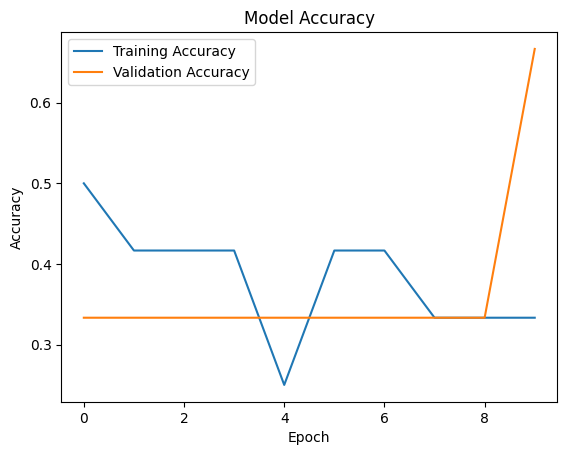

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


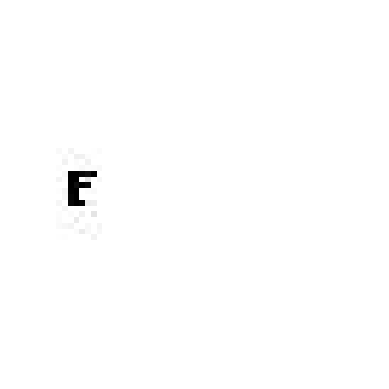

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicted Gesture: fist


In [17]:
from tensorflow.keras.preprocessing import image

img = image.load_img('dataset/fist/fist_1.jpg', target_size=(64, 64))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

class_names = list(train.class_indices.keys())
print("Predicted Gesture:", class_names[predicted_class])
